In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# File to Load 
EPL_sum_table = "Data/EPL_all_seasons_sum.csv"
EPL_matches_table = "Data/EPL_all_seasons_matches.csv"
LaLiga_sum_table = "Data/LaLiga_all_seasons_sum.csv"
LaLiga_matches_table = "Data/LaLiga_all_seasons_matches.csv"
SerieA_sum_table = "Data/serie_a_seasons_sum.csv"
SerieA_matches_table = "Data/serie_a_all_seasons_matches.csv"
Bundes_sum_table = "Data/Bundes_seasonsdata.csv"
Bundes_matches_table = "Data/combined_bundesliga_matches.csv"
Ligue1_sum_table = "Data/Ligue1_all_seasons_sum.csv"
Ligue1_matches_table = "Data/Ligue1_all_seasons_matches.csv"
UEFA_sum_table = "Data/uefa_all_seasons_sum.csv"
UEFA_matches_table = "Data/uefa_all_seasons_matches.csv"

# Read csv files and store into Pandas DataFrames
EPL_sum_df = pd.read_csv(EPL_sum_table, index_col=0)
EPL_matches_df = pd.read_csv(EPL_matches_table, index_col=0)
LaLiga_sum_df = pd.read_csv(LaLiga_sum_table, index_col=0)
LaLiga_matches_df = pd.read_csv(LaLiga_matches_table, index_col=0)
SerieA_sum_df = pd.read_csv(SerieA_sum_table, index_col=0)
SerieA_matches_df = pd.read_csv(SerieA_matches_table, index_col=0)
Bundes_sum_df = pd.read_csv(Bundes_sum_table, index_col=0)
Bundes_matches_df = pd.read_csv(Bundes_matches_table, index_col=0)
Ligue1_sum_df = pd.read_csv(Ligue1_sum_table, index_col=0)
Ligue1_matches_df = pd.read_csv(Ligue1_matches_table, index_col=0)
UEFA_sum_df = pd.read_csv(UEFA_sum_table, index_col=0)
UEFA_matches_df = pd.read_csv(UEFA_matches_table, index_col=0)

In [ ]:
#Ligue1_matches_df = Ligue1_matches_df.drop(424, axis=0)

In [ ]:
#Ligue1_matches_df = Ligue1_matches_df['Actual Diff'] = Ligue1_matches_df['Home Score'].astype(float) - Ligue1_matches_df['Away Score'].astype(float)


In [23]:
# Concatenate summary tables into one dataframe
all_leagues_sum_df = pd.concat([EPL_sum_df, LaLiga_sum_df, SerieA_sum_df,
                                Bundes_sum_df, Ligue1_sum_df], axis=0).reset_index(drop=True)
all_leagues_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            486 non-null    object 
 1   League Rank       474 non-null    float64
 2   Squad             486 non-null    object 
 3   # of Players      474 non-null    float64
 4   Avg Age           486 non-null    float64
 5   Avg Poss          486 non-null    float64
 6   MP                486 non-null    int64  
 7   W                 486 non-null    int64  
 8   D                 486 non-null    int64  
 9   L                 486 non-null    int64  
 10  GF                486 non-null    int64  
 11  GA                486 non-null    int64  
 12  GD                486 non-null    int64  
 13  Pts               486 non-null    int64  
 14  Pts/MP            486 non-null    float64
 15  xG                486 non-null    float64
 16  xGA               486 non-null    float64
 1

In [ ]:
all_leagues_sum_df.dtypes

In [ ]:
all_leagues_sum_df[all_leagues_sum_df['Pts'].isna()]
#test_df = all_leagues_sum_df.dropna(how='all',thresh=6)
#test_df.info()
#all_leagues_sum_cleaned_df = all_leagues_sum_df['MP'] - all_leagues_sum_df['W'] - all_leagues_sum_df['D']

In [ ]:
all_leagues_sum_df['Annual Wages ($)'].value_counts()

In [ ]:
# Remove comma from wages column to allow for conversion to float
#all_leagues_sum_df['Annual Wages ($)'] = all_leagues_sum_df['Annual Wages ($)'].astype(str)
#all_leagues_sum_df['Annual Wages ($)'] = all_leagues_sum_df['Annual Wages ($)'].map(lambda x: x.replace(',', ''))
#all_leagues_sum_df['Annual Wages ($)'] = all_leagues_sum_df['Annual Wages ($)'].astype(float)
#all_leagues_sum_df.info()

In [ ]:
#all_leagues_sum_df['Annual Wages ($)'].value_counts()

In [4]:
# Concatenate matches into one dataframe
all_leagues_matches_df = pd.concat([EPL_matches_df, LaLiga_matches_df, SerieA_matches_df,
                                Bundes_matches_df, Ligue1_matches_df, UEFA_matches_df], axis=0).reset_index(drop=True)
all_leagues_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9766 entries, 0 to 9765
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       9766 non-null   object 
 1   Wk           9610 non-null   float64
 2   Date         9766 non-null   object 
 3   Time         9693 non-null   object 
 4   Home         9766 non-null   object 
 5   Away         9766 non-null   object 
 6   Home Score   9665 non-null   float64
 7   Away Score   9665 non-null   float64
 8   xG Home      9646 non-null   float64
 9   xG Away      9646 non-null   float64
 10  Attendance   7382 non-null   float64
 11  Venue        9766 non-null   object 
 12  Referee      9648 non-null   object 
 13  xG Diff      9646 non-null   float64
 14  Actual Diff  9766 non-null   float64
 15  League       9766 non-null   object 
 16  Round        619 non-null    object 
dtypes: float64(8), object(9)
memory usage: 1.3+ MB


In [5]:
rows_to_remove = all_leagues_matches_df[all_leagues_matches_df['Home Score'].isna()].index
rows_to_remove
all_leagues_matches_cleaned_df = all_leagues_matches_df.drop(rows_to_remove, axis=0)
all_leagues_matches_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9665 entries, 0 to 9765
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       9665 non-null   object 
 1   Wk           9509 non-null   float64
 2   Date         9665 non-null   object 
 3   Time         9665 non-null   object 
 4   Home         9665 non-null   object 
 5   Away         9665 non-null   object 
 6   Home Score   9665 non-null   float64
 7   Away Score   9665 non-null   float64
 8   xG Home      9646 non-null   float64
 9   xG Away      9646 non-null   float64
 10  Attendance   7382 non-null   float64
 11  Venue        9665 non-null   object 
 12  Referee      9648 non-null   object 
 13  xG Diff      9646 non-null   float64
 14  Actual Diff  9665 non-null   float64
 15  League       9665 non-null   object 
 16  Round        619 non-null    object 
dtypes: float64(8), object(9)
memory usage: 1.3+ MB


In [6]:
# Get matches where fans were present
attendance_df = all_leagues_matches_cleaned_df.loc[all_leagues_matches_cleaned_df["Attendance"] > 0, :]
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7382 entries, 0 to 9765
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       7382 non-null   object 
 1   Wk           7274 non-null   float64
 2   Date         7382 non-null   object 
 3   Time         7382 non-null   object 
 4   Home         7382 non-null   object 
 5   Away         7382 non-null   object 
 6   Home Score   7382 non-null   float64
 7   Away Score   7382 non-null   float64
 8   xG Home      7372 non-null   float64
 9   xG Away      7372 non-null   float64
 10  Attendance   7382 non-null   float64
 11  Venue        7382 non-null   object 
 12  Referee      7372 non-null   object 
 13  xG Diff      7372 non-null   float64
 14  Actual Diff  7382 non-null   float64
 15  League       7382 non-null   object 
 16  Round        503 non-null    object 
dtypes: float64(8), object(9)
memory usage: 1.0+ MB


In [7]:
# Get matches where home team won
home_wins_df = attendance_df.loc[attendance_df["Home Score"] > attendance_df["Away Score"], :]
len(home_wins_df)

3274

In [8]:
# Get matches where away team won
away_wins_df = attendance_df.loc[attendance_df["Home Score"] < attendance_df["Away Score"], :]
len(away_wins_df)

2266

In [9]:
# Get matches that ended in a draw
draws_df = attendance_df.loc[attendance_df["Home Score"] == attendance_df["Away Score"], :]
len(draws_df)

1842

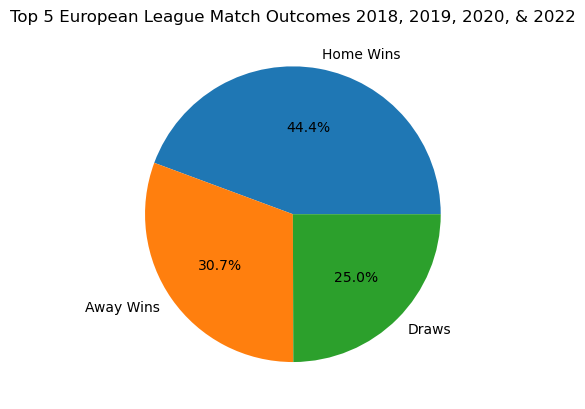

In [10]:
# Calculate % occurance of win/loss/draw
home_win_pct = (len(home_wins_df)/len(attendance_df['Home Score']))
away_win_pct = (len(away_wins_df)/len(attendance_df['Home Score']))
draw_pct = (len(draws_df)/len(attendance_df['Home Score']))

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct, away_win_pct, draw_pct 

plt.title("Top 5 European League Match Outcomes 2018, 2019, 2020, & 2022")
plt.pie(values, labels=labels ,autopct='%1.1f%%')
plt.show()

In [11]:
# Get matches where attendance was 0 
covid_season_df = all_leagues_matches_cleaned_df.loc[all_leagues_matches_cleaned_df["Attendance"].isna()]
covid_season_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 1048 to 9735
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       2283 non-null   object 
 1   Wk           2235 non-null   float64
 2   Date         2283 non-null   object 
 3   Time         2283 non-null   object 
 4   Home         2283 non-null   object 
 5   Away         2283 non-null   object 
 6   Home Score   2283 non-null   float64
 7   Away Score   2283 non-null   float64
 8   xG Home      2274 non-null   float64
 9   xG Away      2274 non-null   float64
 10  Attendance   0 non-null      float64
 11  Venue        2283 non-null   object 
 12  Referee      2276 non-null   object 
 13  xG Diff      2274 non-null   float64
 14  Actual Diff  2283 non-null   float64
 15  League       2283 non-null   object 
 16  Round        116 non-null    object 
dtypes: float64(8), object(9)
memory usage: 321.0+ KB


In [12]:
# Get matches where home team won during 2020-2021 season
home_wins_2_df = covid_season_df.loc[covid_season_df["Home Score"] > covid_season_df["Away Score"], :]
len(home_wins_2_df)

916

In [13]:
# Get matches where away team won during 2020-2021 season
away_wins_2_df = covid_season_df.loc[covid_season_df["Home Score"] < covid_season_df["Away Score"], :]
len(away_wins_2_df)

802

In [14]:
# Get matches where home team won during 2020-2021 season
draws_2_df = covid_season_df.loc[covid_season_df["Home Score"] == covid_season_df["Away Score"], :]
len(draws_2_df)

565

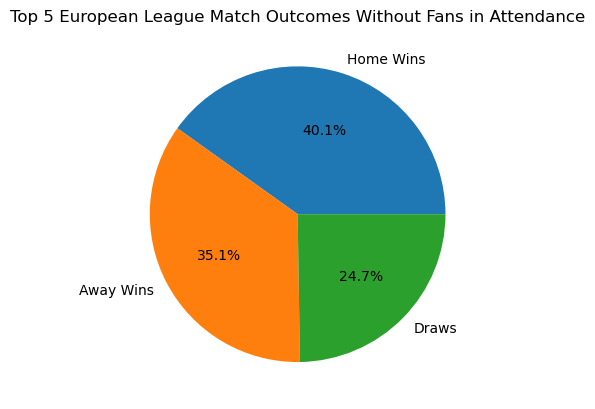

In [15]:
# Calculate % occurance of win/loss/draw
home_win_pct_2 = (len(home_wins_2_df)/len(covid_season_df['Home Score']))
away_win_pct_2 = (len(away_wins_2_df)/len(covid_season_df['Home Score']))
draw_pct_2 = (len(draws_2_df)/len(covid_season_df['Home Score']))

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct_2, away_win_pct_2, draw_pct_2 

plt.title("Top 5 European League Match Outcomes Without Fans in Attendance")
plt.pie(values, labels=labels ,autopct='%1.1f%%')
plt.show()

In [ ]:
# Take absolute value of 'Actual Diff' column
EPL_matches_df['Actual Diff'] = EPL_matches_df['Actual Diff'].abs()
LaLiga_matches_df['Actual Diff'] = LaLiga_matches_df['Actual Diff'].abs()
SerieA_matches_df['Actual Diff'] = SerieA_matches_df['Actual Diff'].abs()
Bundes_matches_df['Actual Diff'] = Bundes_matches_df['Actual Diff'].abs()
Ligue1_matches_df['Actual Diff'] = Ligue1_matches_df['Actual Diff'].abs()
UEFA_matches_df['Actual Diff'] = UEFA_matches_df['Actual Diff'].abs()

# Create variable for goal differential values for each league

EPL_margins = EPL_matches_df['Actual Diff'].unique()
LaLiga_margins = LaLiga_matches_df['Actual Diff'].unique()
SerieA_margins = LaLiga_matches_df['Actual Diff'].unique()
Bundes_margins = SerieA_matches_df['Actual Diff'].unique()
Ligue1_margins = Ligue1_matches_df['Actual Diff'].unique()
UEFA_margins = UEFA_matches_df['Actual Diff'].unique()

EPL_margins

In [16]:
all_leagues_matches_cleaned_df['Total Goals'] = all_leagues_matches_cleaned_df['Home Score'].astype(float) + all_leagues_matches_cleaned_df['Away Score'].astype(float)
all_leagues_matches_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9665 entries, 0 to 9765
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       9665 non-null   object 
 1   Wk           9509 non-null   float64
 2   Date         9665 non-null   object 
 3   Time         9665 non-null   object 
 4   Home         9665 non-null   object 
 5   Away         9665 non-null   object 
 6   Home Score   9665 non-null   float64
 7   Away Score   9665 non-null   float64
 8   xG Home      9646 non-null   float64
 9   xG Away      9646 non-null   float64
 10  Attendance   7382 non-null   float64
 11  Venue        9665 non-null   object 
 12  Referee      9648 non-null   object 
 13  xG Diff      9646 non-null   float64
 14  Actual Diff  9665 non-null   float64
 15  League       9665 non-null   object 
 16  Round        619 non-null    object 
 17  Total Goals  9665 non-null   float64
dtypes: float64(9), object(9)
memory usage: 1.4+ MB


In [ ]:
#all_leagues_matches_cleaned_df[all_leagues_matches_df['League'] == 'Ligue1'].tail()


In [ ]:
# Calculate quartiles & U/L bounds for potential outliers
EPL_quartiles = EPL_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
EPL_Q1 = EPL_quartiles[0.25]
EPL_Q3 = EPL_quartiles[0.75]
EPL_IQR = EPL_Q3-EPL_Q1

EPL_upper_bound = EPL_Q3 + (EPL_IQR*1.5)
EPL_lower_bound = EPL_Q1 - (EPL_IQR*1.5)

print(EPL_upper_bound)
print(EPL_lower_bound)



In [ ]:
# Get matches where final score is considered an outlier
EPL_outliers = EPL_matches_df.loc[(EPL_matches_df['Actual Diff'] < EPL_lower_bound) | 
                                     (EPL_matches_df['Actual Diff'] > EPL_upper_bound), :]

len(EPL_outliers)

In [ ]:
# Calculate quartiles & U/L bounds for potential outliers
LaLiga_quartiles = LaLiga_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
LaLiga_Q1 = LaLiga_quartiles[0.25]
LaLiga_Q3 = LaLiga_quartiles[0.75]
LaLiga_IQR = LaLiga_Q3-LaLiga_Q1

LaLiga_upper_bound = LaLiga_Q3 + (LaLiga_IQR*1.5)
LaLiga_lower_bound = LaLiga_Q1 - (LaLiga_IQR*1.5)

print(LaLiga_upper_bound)
print(LaLiga_lower_bound)

In [ ]:
# Get matches where final score is considered an outlier
LaLiga_outliers = LaLiga_matches_df.loc[(LaLiga_matches_df['Actual Diff'] < LaLiga_lower_bound) | 
                                     (LaLiga_matches_df['Actual Diff'] > LaLiga_upper_bound), :]

len(LaLiga_outliers)

In [ ]:
# Calculate quartiles & U/L bounds for potential outliers
SerieA_quartiles = SerieA_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
SerieA_Q1 = SerieA_quartiles[0.25]
SerieA_Q3 = SerieA_quartiles[0.75]
SerieA_IQR = SerieA_Q3-SerieA_Q1

SerieA_upper_bound = SerieA_Q3 + (SerieA_IQR*1.5)
SerieA_lower_bound = SerieA_Q1 - (SerieA_IQR*1.5)

print(SerieA_upper_bound)
print(SerieA_lower_bound)

In [ ]:
# Get matches where final score is considered an outlier
SerieA_outliers = SerieA_matches_df.loc[(SerieA_matches_df['Actual Diff'] < SerieA_lower_bound) | 
                                     (SerieA_matches_df['Actual Diff'] > SerieA_upper_bound), :]

len(SerieA_outliers)

In [ ]:
# Calculate quartiles & U/L bounds for potential outliers
Bundes_quartiles = Bundes_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
Bundes_Q1 = Bundes_quartiles[0.25]
Bundes_Q3 = Bundes_quartiles[0.75]
Bundes_IQR = Bundes_Q3-SerieA_Q1

Bundes_upper_bound = Bundes_Q3 + (Bundes_IQR*1.5)
Bundes_lower_bound = Bundes_Q1 - (Bundes_IQR*1.5)

print(Bundes_upper_bound)
print(Bundes_lower_bound)

In [ ]:
# Get matches where final score is considered an outlier
Bundes_outliers = Bundes_matches_df.loc[(Bundes_matches_df['Actual Diff'] < Bundes_lower_bound) | 
                                     (Bundes_matches_df['Actual Diff'] > Bundes_upper_bound), :]

len(Bundes_outliers)

In [ ]:
# Calculate quartiles & U/L bounds for potential outliers
Ligue1_quartiles = Ligue1_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
Ligue1_Q1 = Ligue1_quartiles[0.25]
Ligue1_Q3 = Ligue1_quartiles[0.75]
Ligue1_IQR = Ligue1_Q3-Ligue1_Q1

Ligue1_upper_bound = Ligue1_Q3 + (Ligue1_IQR*1.5)
Ligue1_lower_bound = Ligue1_Q1 - (Ligue1_IQR*1.5)

print(Ligue1_upper_bound)
print(Ligue1_lower_bound)

In [ ]:
# Get matches where final score is considered an outlier
Ligue1_outliers = Ligue1_matches_df.loc[(Ligue1_matches_df['Actual Diff'] < lower_bound) | 
                                     (Ligue1_matches_df['Actual Diff'] > upper_bound), :]

len(Ligue1_outliers)

In [ ]:
# Calculate quartiles & U/L bounds for potential outliers
UEFA_quartiles = UEFA_matches_df['Actual Diff'].quantile([0.25,0.5,0.75])
UEFA_Q1 = UEFA_quartiles[0.25]
UEFA_Q3 = UEFA_quartiles[0.75]
UEFA_IQR = UEFA_Q3-UEFA_Q1

UEFA_upper_bound = UEFA_Q3 + (UEFA_IQR*1.5)
UEFA_lower_bound = UEFA_Q1 - (UEFA_IQR*1.5)

print(UEFA_upper_bound)
print(UEFA_lower_bound)

In [ ]:
# Get matches where final score is considered an outlier
UEFA_outliers = UEFA_matches_df.loc[(UEFA_matches_df['Actual Diff'] < UEFA_lower_bound) | 
                                     (UEFA_matches_df['Actual Diff'] > UEFA_upper_bound), :]

len(UEFA_outliers) 

In [ ]:
# Determine how many UCL outliers occur in knockout stages vs group stages
UEFA_outliers_df = pd.DataFrame(UEFA_outliers)
UEFA_outliers_group_stages = UEFA_outliers_df.loc[(UEFA_outliers_df['Round'] == 'Group stage')]
len(UEFA_outliers_group_stages)                                      

In [ ]:
all_leagues_matches_df[all_leagues_matches_df['League'] == 'Ligue1']['Total Goals'].value_counts()

(-3.0, 15.0)

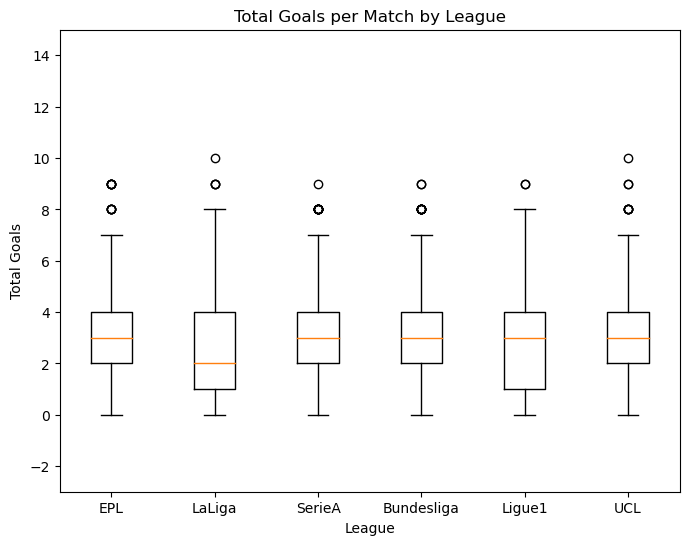

In [17]:
# Generate a box plot showing goal differential in every match over the past 5 years
data = [all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'EPL']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'La Liga']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'Serie A']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'Bundesliga']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'Ligue1']['Total Goals'],
        all_leagues_matches_cleaned_df[all_leagues_matches_cleaned_df['League'] == 'UEFA']['Total Goals']]

league= ['EPL', 'LaLiga','SerieA','Bundesliga', 'Ligue1', 'UCL']

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_title('Total Goals per Match by League')
ax1.set_ylabel('Total Goals')
ax1.set_xlabel('League')
ax1.boxplot(data, labels=league, widths = 0.4,vert=True)
plt.ylim(-3, 15)

In [24]:
# Groupby team name & get mean for all relevant variables
squads_grouped = all_leagues_sum_df.groupby(['Squad'])

mean_age = squads_grouped['Avg Age'].mean()
mean_wages = squads_grouped['Annual Wages ($)'].mean()
mean_poss = squads_grouped['Avg Poss'].mean()
mean_attendance = squads_grouped['Attendance'].mean()
mean_pts = squads_grouped['Pts'].mean()
mean_GF = squads_grouped['GF'].mean()
mean_GA = squads_grouped['GA'].mean()
mean_xG = squads_grouped['xG'].mean()
mean_xGA = squads_grouped['xGA'].mean()
mean_xGD = squads_grouped['xGD'].mean()
mean_GD = squads_grouped['GD'].mean()

In [25]:
# Create dict to hold variables
mean_sum ={
    "Age": mean_age,
    "Possession": mean_poss,
    "Attendance": mean_attendance,
    "Points": mean_pts,
    "Goals For": mean_GF,
    "Goals Against": mean_GA,
    "xGoals For": mean_xG,
    "xGoals Against": mean_xGA,
    "Goal Differential": mean_GD,
    "xGoal Differential": mean_xGD,
    "Avg Wages": mean_wages}

# Create new df from dict
mean_sum_df = pd.DataFrame(mean_sum)

In [26]:
# Round values to 2 decimal places & display df
mean_sum_df = mean_sum_df.round(2)
mean_sum_df

,Age,Possession,Attendance,Points,Goals For,Goals Against,xGoals For,xGoals Against,Goal Differential,xGoal Differential,Avg Wages
Squad,,,,,,,,,,,
Alavés,27.28,41.86,14817.25,41.00,36.00,56.20,39.76,54.76,-20.20,-15.00,2.237093e+07
Amiens,27.50,43.30,9521.00,45.00,37.00,42.00,32.80,54.90,-5.00,-22.10,1.256564e+07
Angers,27.10,45.10,11065.00,41.00,42.00,52.00,47.60,45.80,-10.00,1.80,1.032360e+07
Arminia,25.90,41.50,8547.00,31.50,26.50,52.50,29.60,59.80,-26.00,-30.25,1.030322e+07
Arsenal,25.92,55.92,45421.60,63.80,63.80,47.40,57.54,49.20,16.40,8.36,1.638060e+08
...,...,...,...,...,...,...,...,...,...,...,...
Werder Bremen,26.60,48.05,26765.00,39.25,43.25,53.75,40.25,52.45,-10.50,-12.23,3.435884e+07
West Brom,27.75,39.30,12401.50,28.50,33.00,66.00,36.15,57.90,-33.00,-21.70,5.841702e+07
West Ham,27.80,45.80,43675.60,50.80,54.20,56.60,47.94,56.60,-2.40,-8.66,8.940771e+07


In [ ]:
mean_sum_df['Avg Wages']

In [30]:
# Calculate average dollars spent per point earned for each team
dollars_per_point = (mean_sum_df['Avg Wages'] / 1000) / mean_sum_df['Points']
print(dollars_per_point)

Squad
Alavés            545.632410
Amiens            279.236556
Angers            251.795171
Arminia           327.086333
Arsenal          2567.491918
                    ...     
Werder Bremen     875.384490
West Brom        2049.720018
West Ham         1759.994327
Wolfsburg        1316.665571
Wolves           1147.012896
Length: 128, dtype: float64


Text(0.5, 0, 'Wages in $ Millions')

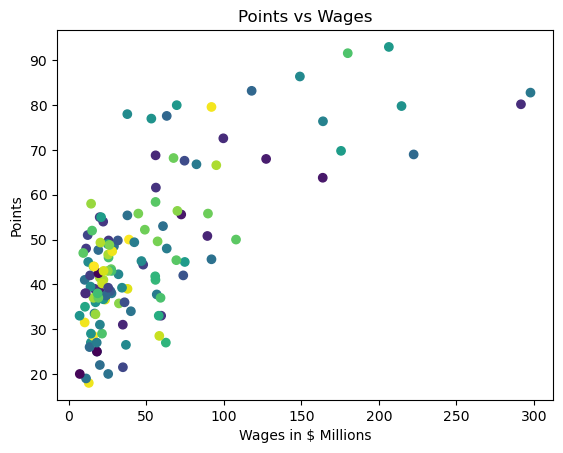

In [34]:
# Plot Points vs Wages
y_axis = mean_sum_df["Points"]
x_axis = (mean_sum_df["Avg Wages"] / 1000000)
colors = np.random.rand(len(mean_sum_df["Points"]))
fig1, ax1 = plt.subplots()
plt.title('Points vs Wages')
plt.scatter(x_axis, y_axis,c=colors, cmap='viridis')
plt.ylabel('Points')
plt.xlabel('Wages in $ Millions')

(20.0, 80.0)

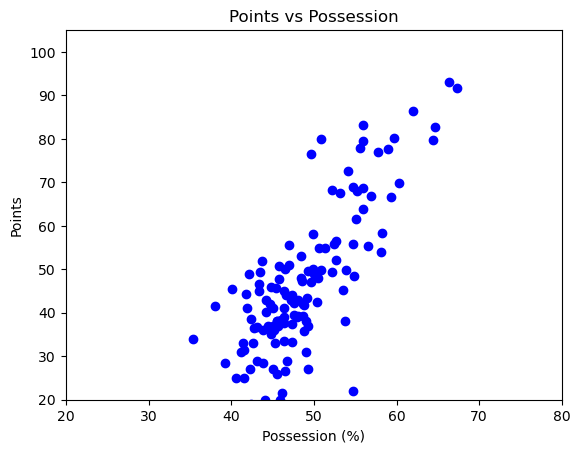

In [36]:
# Plot points vs possession
y_axis = mean_sum_df["Points"]
x_axis = mean_sum_df["Possession"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Possession')
plt.scatter(x_axis, y_axis,color="b")
plt.ylabel('Points')
plt.xlabel('Possession (%)')
plt.ylim(20,105)
plt.xlim(20,80)

In [ ]:
# Plot points vs xGoals Scored
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["xGoals For"]

fig1, ax1 = plt.subplots()
plt.title('Points vs xGoals Scored')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('xGoals For')
plt.xlim(20,105)
plt.ylim(20,100)

In [ ]:
# Plot points vs actual goals scored
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Goals For"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Goals Scored')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('Goals For')
plt.xlim(20,105)
plt.ylim(20,100)

In [ ]:
# Plot points vs xGoals Against
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["xGoals Against"]

fig1, ax1 = plt.subplots()
plt.title('Points vs xGoals Against')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('xGoals Against')
plt.xlim(20,105)
plt.ylim(20,100)

In [ ]:
# Plot points vs actual goals against
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Goals Against"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Goals Against')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('Goals Against')
plt.xlim(20,105)
plt.ylim(20,100)

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Avg Wages"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Avg Wages"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Wages ($)")
plt.title("Points vs Wages")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Possession"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Possession"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Possession")
plt.title("Points vs Possession")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals For"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals For"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("xGoals Scored")
plt.title("Points vs XGoals Scored")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals For"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals For"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Goals Scored")
plt.title("Points vs Goals Scored")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals Against"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals Against"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(30,36))
plt.xlabel("Points")
plt.ylabel("xGoals Against")
plt.title("Points vs XGoals Against")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [ ]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals Against"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals Against"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(30,36))
plt.xlabel("Points")
plt.ylabel("Goals Against")
plt.title("Points vs Goals Against")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

In [37]:
mean_sum_df.columns

Index(['Age', 'Possession', 'Attendance', 'Points', 'Goals For',
       'Goals Against', 'xGoals For', 'xGoals Against', 'Goal Differential',
       'xGoal Differential', 'Avg Wages'],
      dtype='object')

In [40]:
league_grouped = all_leagues_sum_df.groupby(['League'])

mean_age = league_grouped['Avg Age'].mean()
mean_wages = league_grouped['Annual Wages ($)'].mean()
mean_poss = league_grouped['Avg Poss'].mean()
mean_attendance = league_grouped['Attendance'].mean()
mean_pts = league_grouped['Pts'].mean()
mean_GF = league_grouped['GF'].mean()
mean_GA = league_grouped['GA'].mean()
mean_xG = league_grouped['xG'].mean()
mean_xGA = league_grouped['xGA'].mean()
mean_xGD = league_grouped['xGD'].mean()
mean_GD = league_grouped['GD'].mean()


In [42]:
# Create dict to hold variables
league_grouped_sum ={
    "Age": mean_age,
    "Possession": mean_poss,
    "Attendance": mean_attendance,
    "Points": mean_pts,
    "Goals For": mean_GF,
    "Goals Against": mean_GA,
    "xGoals For": mean_xG,
    "xGoals Against": mean_xGA,
    "Goal Differential": mean_GD,
    "xGoal Differential": mean_xGD,
    "Avg Wages": mean_wages}

# Create new df from dict
league_grouped_sum_df = pd.DataFrame(league_grouped_sum)
league_grouped_sum_df.head()

,Age,Possession,Attendance,Points,Goals For,Goals Against,xGoals For,xGoals Against,Goal Differential,xGoal Differential,Avg Wages
League,,,,,,,,,,,
Bundesliga,25.922727,50.076136,27556.954545,47.181818,52.465909,51.897727,50.180682,49.713636,0.568182,0.473864,4.962603e+07
EPL,26.720000,50.000000,29258.510000,52.670000,52.190000,52.190000,50.093000,50.096000,0.000000,-0.002000,9.775193e+07
La Liga,27.181633,50.142857,23651.280488,51.948980,48.795918,48.561224,48.743878,48.662245,0.234694,0.086735,7.034345e+07
Ligue1,25.995000,49.995000,22398.350000,52.200000,51.650000,51.650000,49.565000,49.575000,0.000000,-0.010000,3.021376e+07
Serie A,26.943000,49.999000,17102.530000,52.270000,54.420000,54.420000,52.007000,52.011000,0.000000,0.002000,4.363337e+07


(0.0, 30.0)

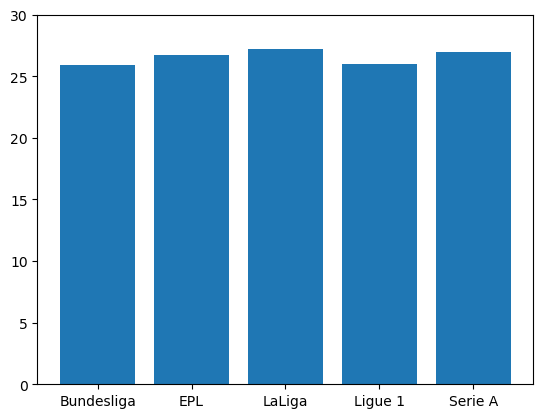

In [49]:
y_axis = league_grouped_sum_df['Age']
x_axis = ['Bundesliga', 'EPL','LaLiga','Ligue 1', 'Serie A']
plt.bar(x_axis, y_axis)
plt.ylim(0,30)

<BarContainer object of 5 artists>

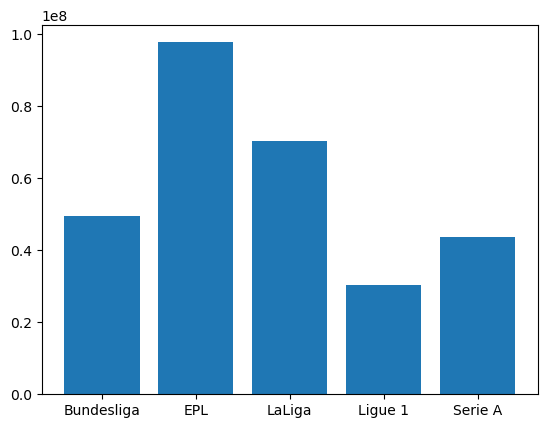

In [50]:
y_axis = league_grouped_sum_df['Avg Wages']
x_axis = ['Bundesliga', 'EPL','LaLiga','Ligue 1', 'Serie A']
plt.bar(x_axis, y_axis)
#plt.ylim()

In [56]:
all_leagues_sum_df.columns

Index(['Season', 'League Rank', 'Squad', '# of Players', 'Avg Age', 'Avg Poss',
       'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA',
       'xGD', 'xGD/90', 'Attendance', 'Annual Wages ($)', 'League', 'index'],
      dtype='object')

In [64]:
year_grouped = all_leagues_sum_df.groupby(['League', 'Season']).agg({'GF': 'sum', 'Annual Wages ($)': 'mean'})
year_grouped

GF  Annual Wages ($)
League     Season                           
Bundesliga 2017-2018   811      4.620808e+07
           2018-2019   942      5.129115e+07
           2019-2020   982      5.394498e+07
           2020-2021   928      5.053548e+07
           2021-2022   954      4.605309e+07
EPL        2017-2018  1018      9.202020e+07
           2018-2019  1072      9.747985e+07
           2019-2020  1034      9.448564e+07
           2020-2021  1024      1.012749e+08
           2021-2022  1071      1.034991e+08
La Liga    2017-2018   990      5.610859e+07
           2018-2019   946      7.013623e+07
           2019-2020   942      7.381299e+07
           2020-2021   953      7.742880e+07
           2021-2022   951      7.350853e+07
Ligue1     2017-2018  1033      3.021376e+07
           2018-2019  1033      3.021376e+07
           2019-2020  1033      3.021376e+07
           2020-2021  1033      3.021376e+07
           2021-2022  1033      3.021376e+07
Serie A    2017-2018  1017      4.363337e+07
           2018-2019  1019      4.363337e+07
           2019-2020  1154      4.363337e+07
           2020-2021  1163      4.363337e+07
           2021-2022  1089      4.363337e+07

In [65]:
year_grouped.index

MultiIndex([('Bundesliga', '2017-2018'),
            ('Bundesliga', '2018-2019'),
            ('Bundesliga', '2019-2020'),
            ('Bundesliga', '2020-2021'),
            ('Bundesliga', '2021-2022'),
            (       'EPL', '2017-2018'),
            (       'EPL', '2018-2019'),
            (       'EPL', '2019-2020'),
            (       'EPL', '2020-2021'),
            (       'EPL', '2021-2022'),
            (   'La Liga', '2017-2018'),
            (   'La Liga', '2018-2019'),
            (   'La Liga', '2019-2020'),
            (   'La Liga', '2020-2021'),
            (   'La Liga', '2021-2022'),
            (    'Ligue1', '2017-2018'),
            (    'Ligue1', '2018-2019'),
            (    'Ligue1', '2019-2020'),
            (    'Ligue1', '2020-2021'),
            (    'Ligue1', '2021-2022'),
            (   'Serie A', '2017-2018'),
            (   'Serie A', '2018-2019'),
            (   'Serie A', '2019-2020'),
            (   'Serie A', '2020-2021'),
            (   

In [67]:
#year_grouped_wages = pd.pivot(year_grouped, index='Season',columns='League', values= 'Annual Wages ($)')
year_grouped = year_grouped.reset_index().rename(columns={'level_0': 'League', 'level_1': 'Season'})
year_grouped

,index,League,Season,GF,Annual Wages ($)
0,0,Bundesliga,2017-2018,811,4.620808e+07
1,1,Bundesliga,2018-2019,942,5.129115e+07
2,2,Bundesliga,2019-2020,982,5.394498e+07
3,3,Bundesliga,2020-2021,928,5.053548e+07
4,4,Bundesliga,2021-2022,954,4.605309e+07
5,5,EPL,2017-2018,1018,9.202020e+07
6,6,EPL,2018-2019,1072,9.747985e+07
7,7,EPL,2019-2020,1034,9.448564e+07
8,8,EPL,2020-2021,1024,1.012749e+08
9,9,EPL,2021-2022,1071,1.034991e+08


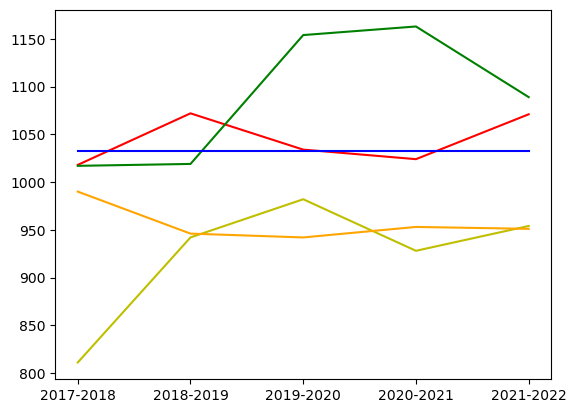

In [77]:
x_axis_bundes = year_grouped[year_grouped['League'] == 'Bundesliga']['Season']
y_axis_bundes = year_grouped[year_grouped['League'] == 'Bundesliga']['GF']
plt.plot(x_axis_bundes, y_axis_bundes, color='y')

x_axis_EPL = year_grouped[year_grouped['League'] == 'EPL']['Season']
y_axis_EPL = year_grouped[year_grouped['League'] == 'EPL']['GF']
plt.plot(x_axis_EPL, y_axis_EPL, color='r')

x_axis_LaLiga = year_grouped[year_grouped['League'] == 'La Liga']['Season']
y_axis_LaLiga = year_grouped[year_grouped['League'] == 'La Liga']['GF']
plt.plot(x_axis_LaLiga, y_axis_LaLiga, color='orange')

x_axis_serieA = year_grouped[year_grouped['League'] == 'Serie A']['Season']
y_axis_serieA = year_grouped[year_grouped['League'] == 'Serie A']['GF']
plt.plot(x_axis_serieA, y_axis_serieA, color='green')

x_axis_ligue1 = year_grouped[year_grouped['League'] == 'Ligue1']['Season']
y_axis_ligue1 = year_grouped[year_grouped['League'] == 'Ligue1']['GF']
plt.plot(x_axis_ligue1, y_axis_ligue1, color='b')